In [1]:
using LinearAlgebra, Plots, Printf, ForwardDiff

Below is a Julia implementation of gradient method with exact linesearch for minimizing quadratic functions of the form

$$
f(x) = \frac12 x^T Ax + b^T x.
$$

In [2]:
function descent_method_exact_ls(A, b, x0, ϵ=1e-6)
    x = copy(x0)
    ∇f = A*x + b
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ
        α = dot(∇f,∇f) / dot(∇f,A*∇f)
        x = x - α*∇f
        ∇f = A*x + b
        f = (1/2)x'*A*x + b'*x
        @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
        k += 1
        xtrace = vcat(xtrace,x')
    end
    return xtrace
end

descent_method_exact_ls (generic function with 2 methods)

We use gradient method with exact linesearch to minimize $f(x,y) = 2x^2 + 9y^2$ starting at $(x_0, y_0) = (2,2)$. Define the matrix $A$ and vector $b$ as:

$$
A = \begin{bmatrix}
2 & 0 \\
0 & 9 \end{bmatrix}, \qquad b = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

In [3]:
A = [2 0;0 9]
b = [0, 0]
x0 = [2, 2]
xtrace = descent_method_exact_ls(A, b, x0);

it =   0 | |∇f| = 3.15e+00 | f = 2.39e+00
it =   1 | |∇f| = 2.01e+00 | f = 2.60e-01
it =   2 | |∇f| = 3.43e-01 | f = 2.83e-02
it =   3 | |∇f| = 2.18e-01 | f = 3.08e-03
it =   4 | |∇f| = 3.73e-02 | f = 3.35e-04
it =   5 | |∇f| = 2.37e-02 | f = 3.65e-05
it =   6 | |∇f| = 4.06e-03 | f = 3.97e-06
it =   7 | |∇f| = 2.58e-03 | f = 4.32e-07
it =   8 | |∇f| = 4.42e-04 | f = 4.70e-08
it =   9 | |∇f| = 2.81e-04 | f = 5.11e-09
it =  10 | |∇f| = 4.80e-05 | f = 5.56e-10
it =  11 | |∇f| = 3.06e-05 | f = 6.05e-11
it =  12 | |∇f| = 5.23e-06 | f = 6.58e-12
it =  13 | |∇f| = 3.33e-06 | f = 7.16e-13
it =  14 | |∇f| = 5.69e-07 | f = 7.79e-14


Plot the path of gradient method on the contour plot of $f(x, y) = 2x^2 + 9y^2$.

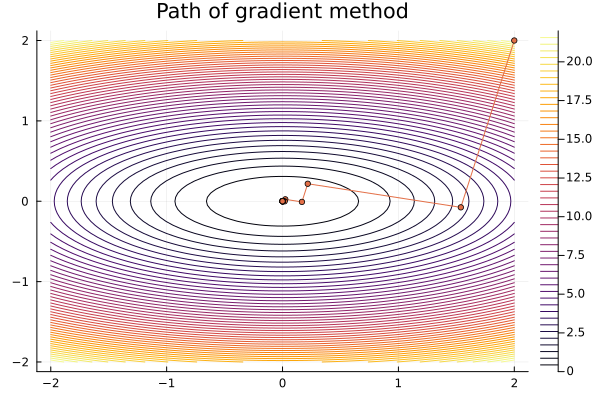

In [4]:
f(x1,x2) = (1/2)*[x1, x2]'*A*[x1, x2]+b'*[x1,x2]
x1 = -2:0.05:2
x2 = -2:0.05:2;
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1], xtrace[:,2], marker = 3 ,legend = false, title = "Path of gradient method")

In [11]:
function descent_method_constant(A, b, x0, ϵ=1e-6)
    x = copy(x0)
    ∇f = A*x + b
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ
        α = 2/maximum(eigvals(A)) 
        x = x - α*∇f
        ∇f = A*x + b
        f = (1/2)x'*A*x + b'*x
        @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
        k += 1
        xtrace = vcat(xtrace,x')
    end
    return xtrace
end

descent_method_constant (generic function with 2 methods)

it =   0 | |∇f| = 1.45e+01 | f = 1.45e+01
it =   1 | |∇f| = 1.15e+01 | f = 9.85e+00
it =   2 | |∇f| = 9.14e+00 | f = 6.94e+00
it =   3 | |∇f| = 7.35e+00 | f = 5.08e+00
it =   4 | |∇f| = 5.99e+00 | f = 3.87e+00
it =   5 | |∇f| = 4.96e+00 | f = 3.06e+00
it =   6 | |∇f| = 4.18e+00 | f = 2.50e+00
it =   7 | |∇f| = 3.60e+00 | f = 2.10e+00
it =   8 | |∇f| = 3.15e+00 | f = 1.80e+00
it =   9 | |∇f| = 2.82e+00 | f = 1.57e+00
it =  10 | |∇f| = 2.56e+00 | f = 1.38e+00
it =  11 | |∇f| = 2.35e+00 | f = 1.23e+00
it =  12 | |∇f| = 2.18e+00 | f = 1.10e+00
it =  13 | |∇f| = 2.04e+00 | f = 9.85e-01
it =  14 | |∇f| = 1.92e+00 | f = 8.85e-01
it =  15 | |∇f| = 1.81e+00 | f = 7.97e-01
it =  16 | |∇f| = 1.71e+00 | f = 7.18e-01
it =  17 | |∇f| = 1.62e+00 | f = 6.48e-01
it =  18 | |∇f| = 1.54e+00 | f = 5.85e-01
it =  19 | |∇f| = 1.46e+00 | f = 5.28e-01
it =  20 | |∇f| = 1.38e+00 | f = 4.77e-01
it =  21 | |∇f| = 1.31e+00 | f = 4.31e-01
it =  22 | |∇f| = 1.25e+00 | f = 3.90e-01
it =  23 | |∇f| = 1.19e+00 | f = 3

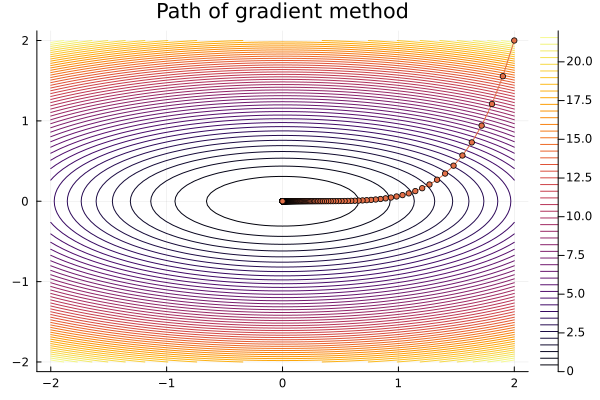

In [10]:
A = [2 0;0 9]
b = [0, 0]
x0 = [2, 2]
xtrace = descent_method_constant(A, b, x0);

f(x1,x2) = (1/2)*[x1, x2]'*A*[x1, x2]+b'*[x1,x2]
x1 = -2:0.05:2
x2 = -2:0.05:2;
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1], xtrace[:,2], marker = 3 ,legend = false, title = "Path of gradient method")